# Required Task for Project

## a. Loading and description of the dataset

In [2]:
import pandas as pd
df = pd.read_csv('NFLX.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')


In [3]:
print("This DataFrame has {} rows and {} columns.".format(df.shape[0], df.shape[1]))
print("\nColumn Names in the DataFrame:")
print(df.columns)
print("\nTop 5 rows of the DataFrame:")
print(df.head(5))
print("\nBottom 5 rows of the DataFrame:")
print(df.tail(5))
print("\nDataFrame Information:")
print(df.info())

This DataFrame has 251 rows and 7 columns.

Column Names in the DataFrame:
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

Top 5 rows of the DataFrame:
        Date        Open        High         Low       Close   Adj Close  \
0 2023-02-01  353.859985  365.390015  349.910004  361.989990  361.989990   
1 2023-02-02  365.160004  368.320007  358.429993  366.890015  366.890015   
2 2023-02-03  359.079987  379.429993  359.000000  365.899994  365.899994   
3 2023-02-06  363.640015  368.450012  360.679993  361.480011  361.480011   
4 2023-02-07  358.510010  364.179993  354.179993  362.950012  362.950012   

    Volume  
0  8005200  
1  7857000  
2  9402000  
3  4994900  
4  6289400  

Bottom 5 rows of the DataFrame:
          Date        Open        High         Low       Close   Adj Close  \
246 2024-01-25  551.950012  563.460022  548.460022  562.000000  562.000000   
247 2024-01-26  561.809998  579.640015  558.429993  570.419983  570.419983   
248 20

## b. Minimal exploratory analysis and graphs

In [4]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,251,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,2023-08-01 05:44:13.386454272,404.181354,409.754742,398.958446,404.270478,404.270478,6.135308e+06
min,2023-02-01 00:00:00,287.339996,297.450012,285.329987,292.760010,292.760010,1.404700e+06
25%,2023-05-02 12:00:00,348.994995,356.860001,344.490005,348.119995,348.119995,3.966000e+06
50%,2023-08-02 00:00:00,412.000000,418.839996,407.399994,411.690002,411.690002,5.128900e+06
75%,2023-10-30 12:00:00,444.729996,448.574997,439.175003,444.944992,444.944992,6.880600e+06
max,2024-01-31 00:00:00,571.349976,579.640015,562.679993,575.789978,575.789978,2.807440e+07
std,NaN,60.849872,61.318707,60.722608,61.193722,61.193722,3.814621e+06


### Daily Open, Close, High and Low Graph

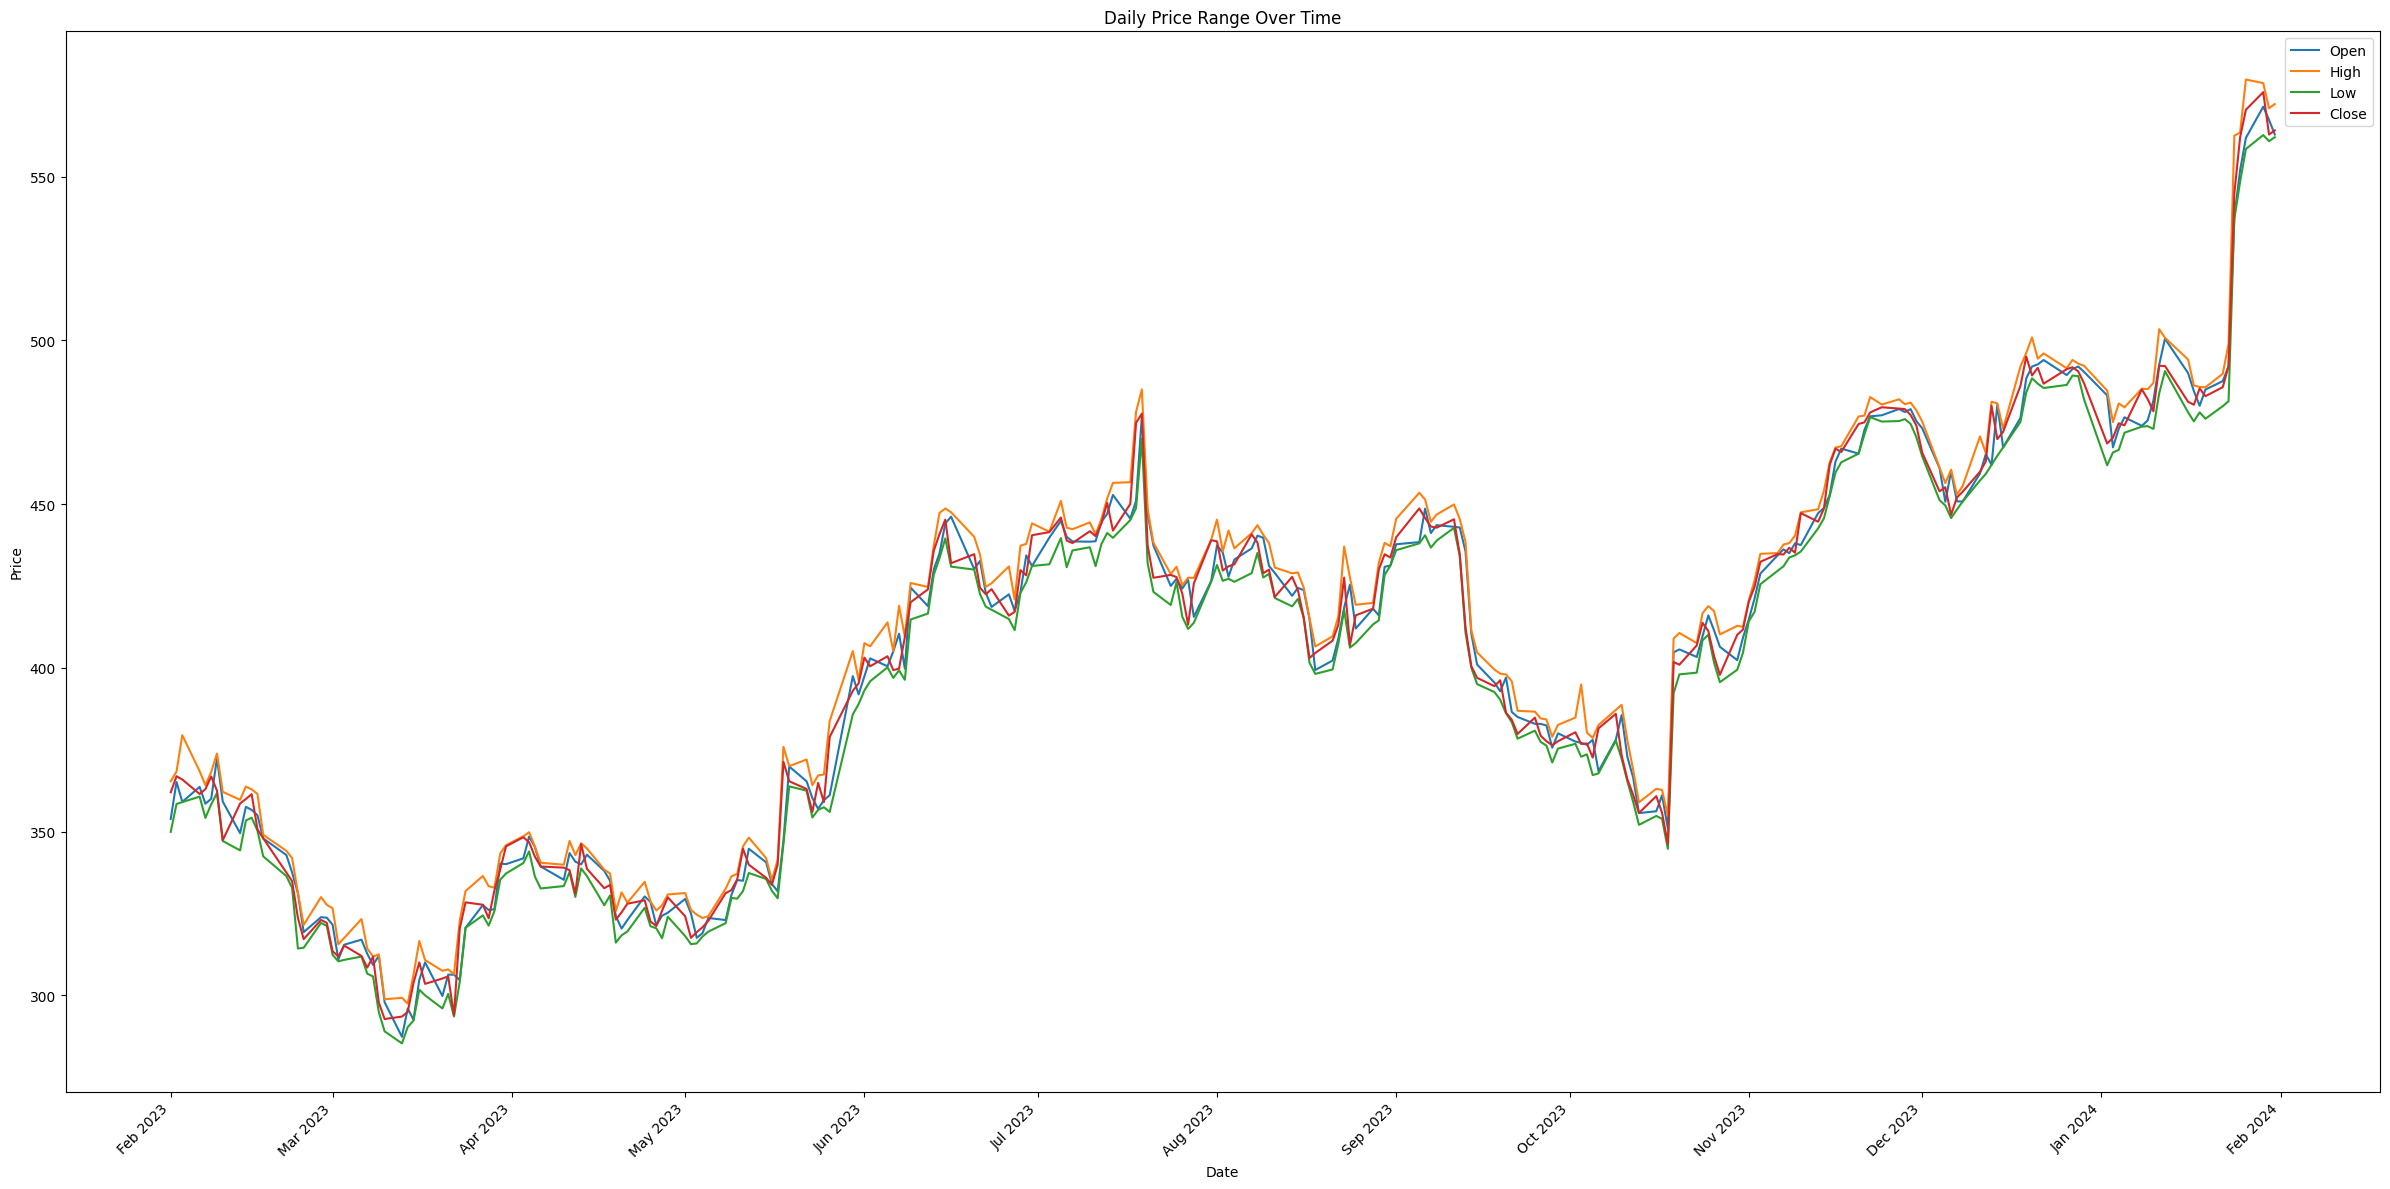

In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(24,12))
plt.plot(df['Date'], df['Open'], label='Open')
plt.plot(df['Date'], df['High'], label='High')
plt.plot(df['Date'], df['Low'], label='Low')
plt.plot(df['Date'], df['Close'], label='Close')
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45, ha='right')
plt.title("Daily Price Range Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.tight_layout()
plt.show()



### Daily Volume Traded Over Time Graph

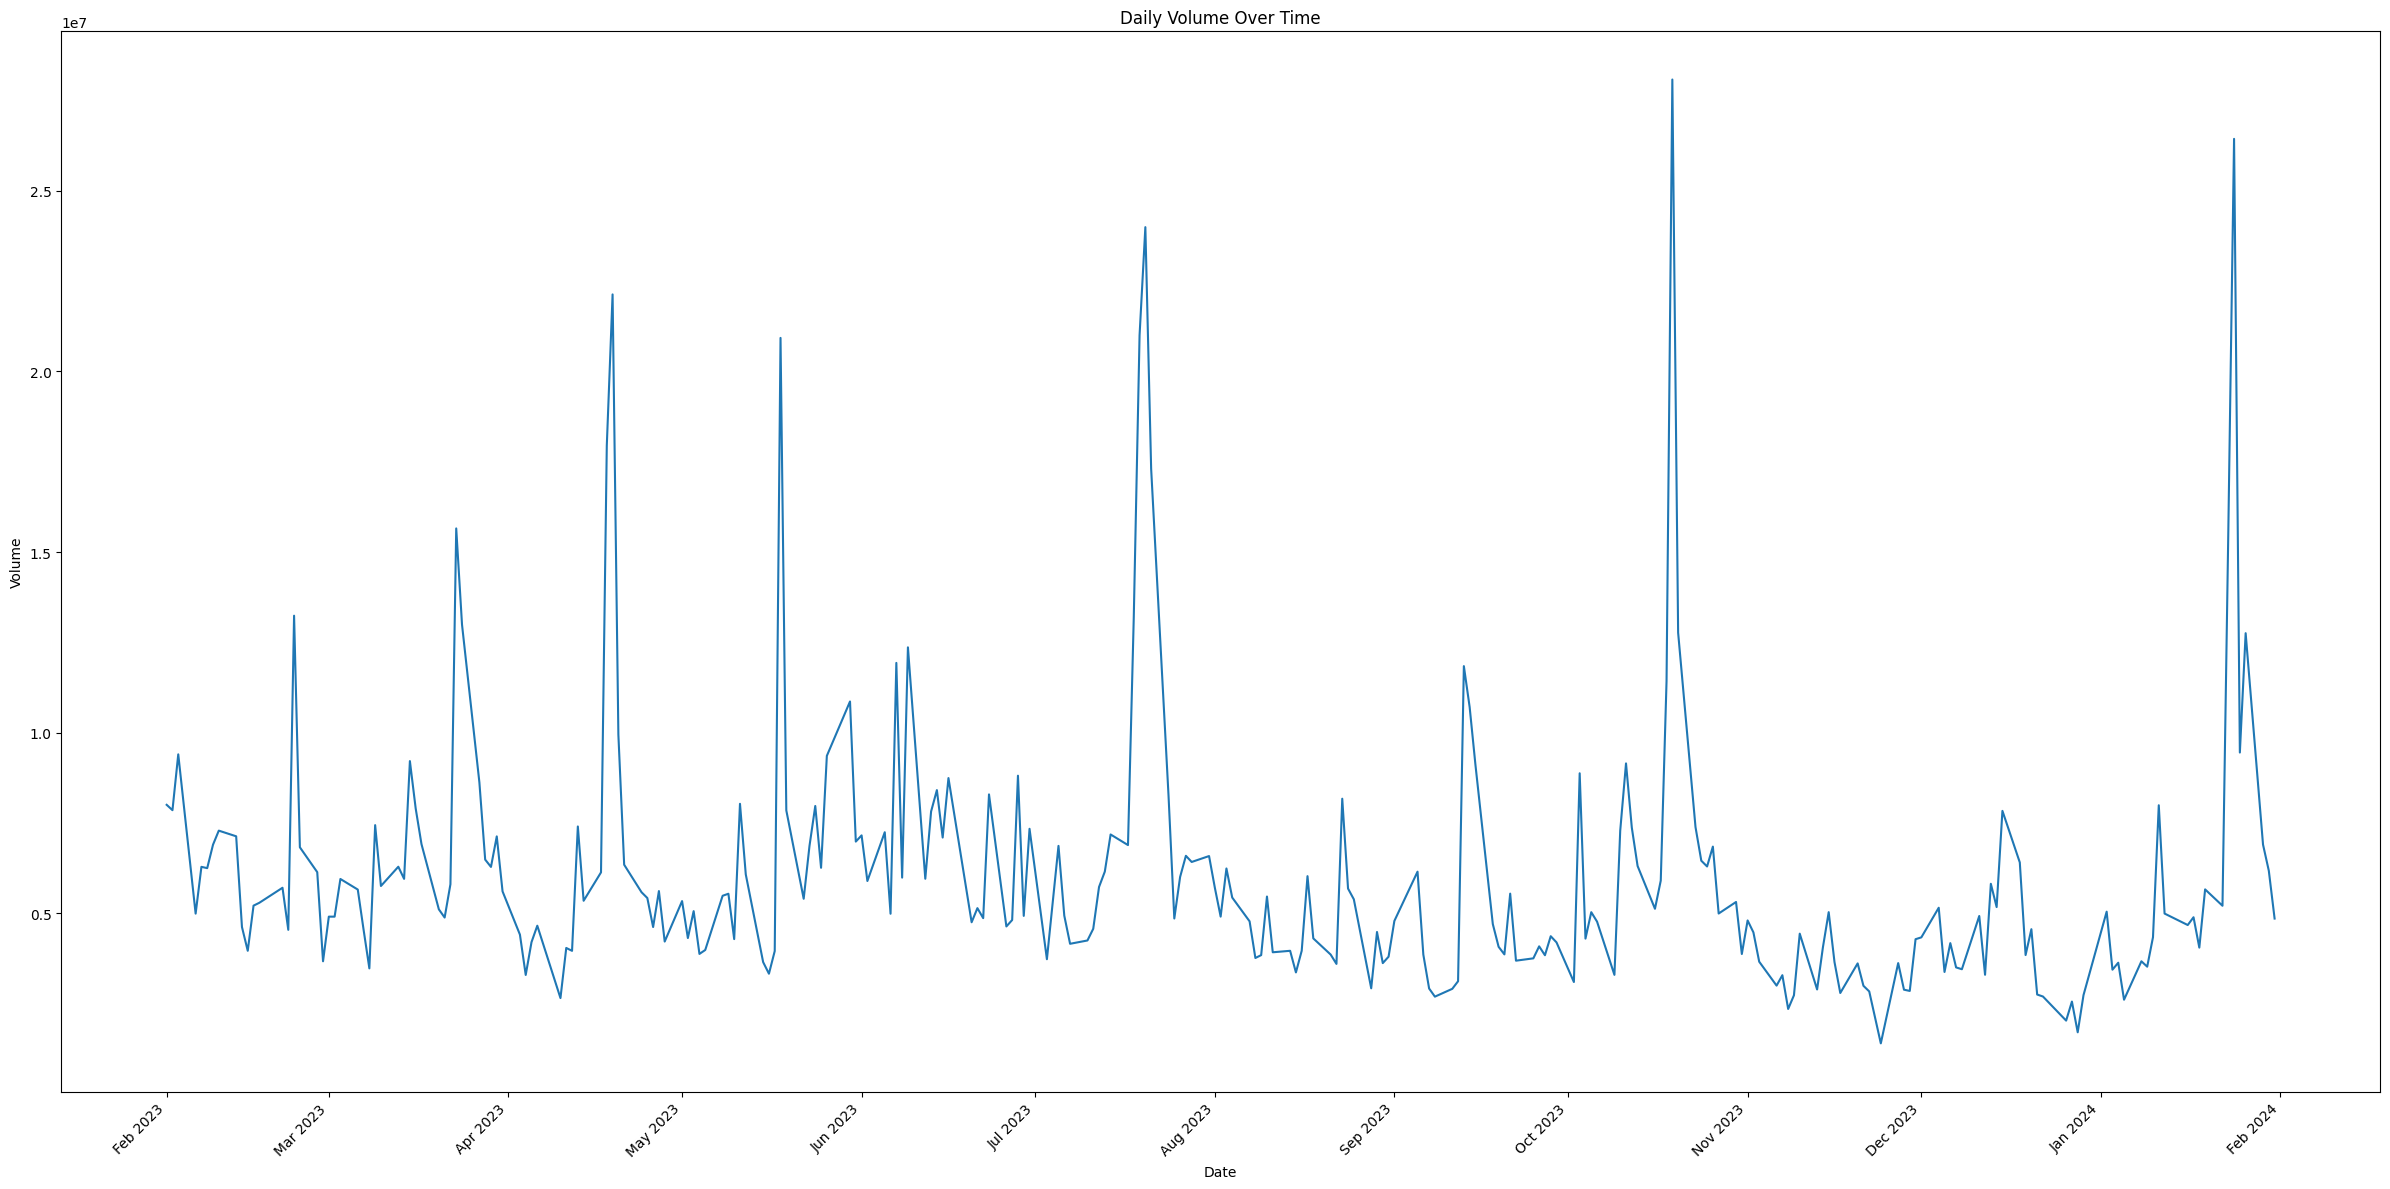

In [6]:
plt.figure(figsize=(24,12))
plt.plot(df['Date'], df['Volume'], label='Volume', color='C0')
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45, ha='right')
plt.title("Daily Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.tight_layout()
plt.show()

## c. Data Preparation

### Adequate treatment of the Date spine
  * Date was converted to "datetime64[ns]" data type using Pandas Package when the DF was imported from CSV.
  * The rows of the dataframe were already sorted when they were imported from the csv file but we still sorted it just to be sure.

### Treatment of missing amounts or inconsistencies, if any
 * There are no inconsistencies in the dataset, some days are missing but the days that are missing are public holidays when the market was  probably closed.
 * The consistency of dataset is also tested below.

Checking DF for any Null, Duplicate or Invalid Values

In [7]:
print("There are no Null values in any column:")
print(df.isnull().sum())
print()
print(f"Number of duplicate lines in df: {df.duplicated(keep=False).sum().item()}")


There are no Null values in any column:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Number of duplicate lines in df: 0


Also few other checkings in the DF, that we can see from graphs above are: 
 * There are no negative values for Open, Close, High and Low.
 * High is never less than low for the day

### Creation of input variables and definition of the target variable (Close)

In [8]:
input_variables = ["Open", "High", "Low", "Volume"]
target_variable = "Close"

## d. Training and Sequential Test division, without randomly shuffling the lines

In [9]:
split_index = int(0.8 * len(df))
train_df = df.iloc[:split_index]
test_df = df.iloc[split_index:]
print(f"Training set has {train_df.shape[0]} rows and {train_df.shape[1]} columns.")
print(train_df.head(10))
print(train_df.tail(10))
print(f"Testing set has {test_df.shape[0]} rows and {test_df.shape[1]} columns.")
print(test_df.head(10))
print(test_df.tail(10))

Training set has 200 rows and 7 columns.
        Date        Open        High         Low       Close   Adj Close  \
0 2023-02-01  353.859985  365.390015  349.910004  361.989990  361.989990   
1 2023-02-02  365.160004  368.320007  358.429993  366.890015  366.890015   
2 2023-02-03  359.079987  379.429993  359.000000  365.899994  365.899994   
3 2023-02-06  363.640015  368.450012  360.679993  361.480011  361.480011   
4 2023-02-07  358.510010  364.179993  354.179993  362.950012  362.950012   
5 2023-02-08  360.019989  368.190002  358.309998  366.829987  366.829987   
6 2023-02-09  372.410004  373.829987  361.739990  362.500000  362.500000   
7 2023-02-10  359.160004  362.140015  347.140015  347.359985  347.359985   
8 2023-02-13  349.500000  359.700012  344.250000  358.570007  358.570007   
9 2023-02-14  357.549988  363.750000  353.399994  359.959991  359.959991   

    Volume  
0  8005200  
1  7857000  
2  9402000  
3  4994900  
4  6289400  
5  6253200  
6  6901100  
7  7291100  
8  71

## e. Implementation, Training and Evaluation of the two required models: Linear Regression and KNN

### Linear Regression Model Training

In [15]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(train_df[input_variables], train_df[target_variable])

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Linear Regression Model Predections

In [ ]:
linear_model_predictions = linear_model.predict(test_df[input_variables])
print("Linear Model Predictions:")
print(linear_model_predictions)

Linear Model Predictions:
[463.92207044 464.85814396 473.74253335 475.46553506 481.6682431
 478.60780275 478.89140625 479.04929788 477.36082317 474.22888759
 467.71775438 453.34830655 454.59973424 447.91698075 451.25780681
 455.24047881 465.69021309 461.18551591 475.18226125 467.06694953
 472.97493835 486.37832345 490.39859381 495.4956962  489.50952958
 488.35154065 489.20808798 492.55018206 491.16568178 484.74821157
 464.7778138  472.00350059 472.82865934 475.2437141  482.01003748
 481.11406515 478.00747036 492.55873876 492.84429249 482.42633888
 478.27493836 483.21523606 478.59516077 483.27211923 488.9399485
 556.44444463 557.86178251 571.9517996  569.28745366 565.21709972
 569.53849733]


### Linear Regression Model Scores

In [17]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import root_mean_squared_error as rmse
from sklearn.metrics import r2_score as r2

linear_model_mse = mse(test_df[target_variable], linear_model_predictions)
linear_model_rmse = rmse(test_df[target_variable], linear_model_predictions)
linear_model_r2 = r2(test_df[target_variable], linear_model_predictions)
print(f"Linear Regression Model Performance on Test Set:")
print(f"Mean Squared Error (MSE): {linear_model_mse}")
print(f"Root Mean Squared Error (RMSE): {linear_model_rmse}")
print(f"R-squared (R2 ): {linear_model_r2}")

Linear Regression Model Performance on Test Set:
Mean Squared Error (MSE): 9.56930987218143
Root Mean Squared Error (RMSE): 3.0934301143199323
R-squared (R2 ): 0.9896059139109668


### Graph comparing Predicted Closing Price and Actual Closing Price

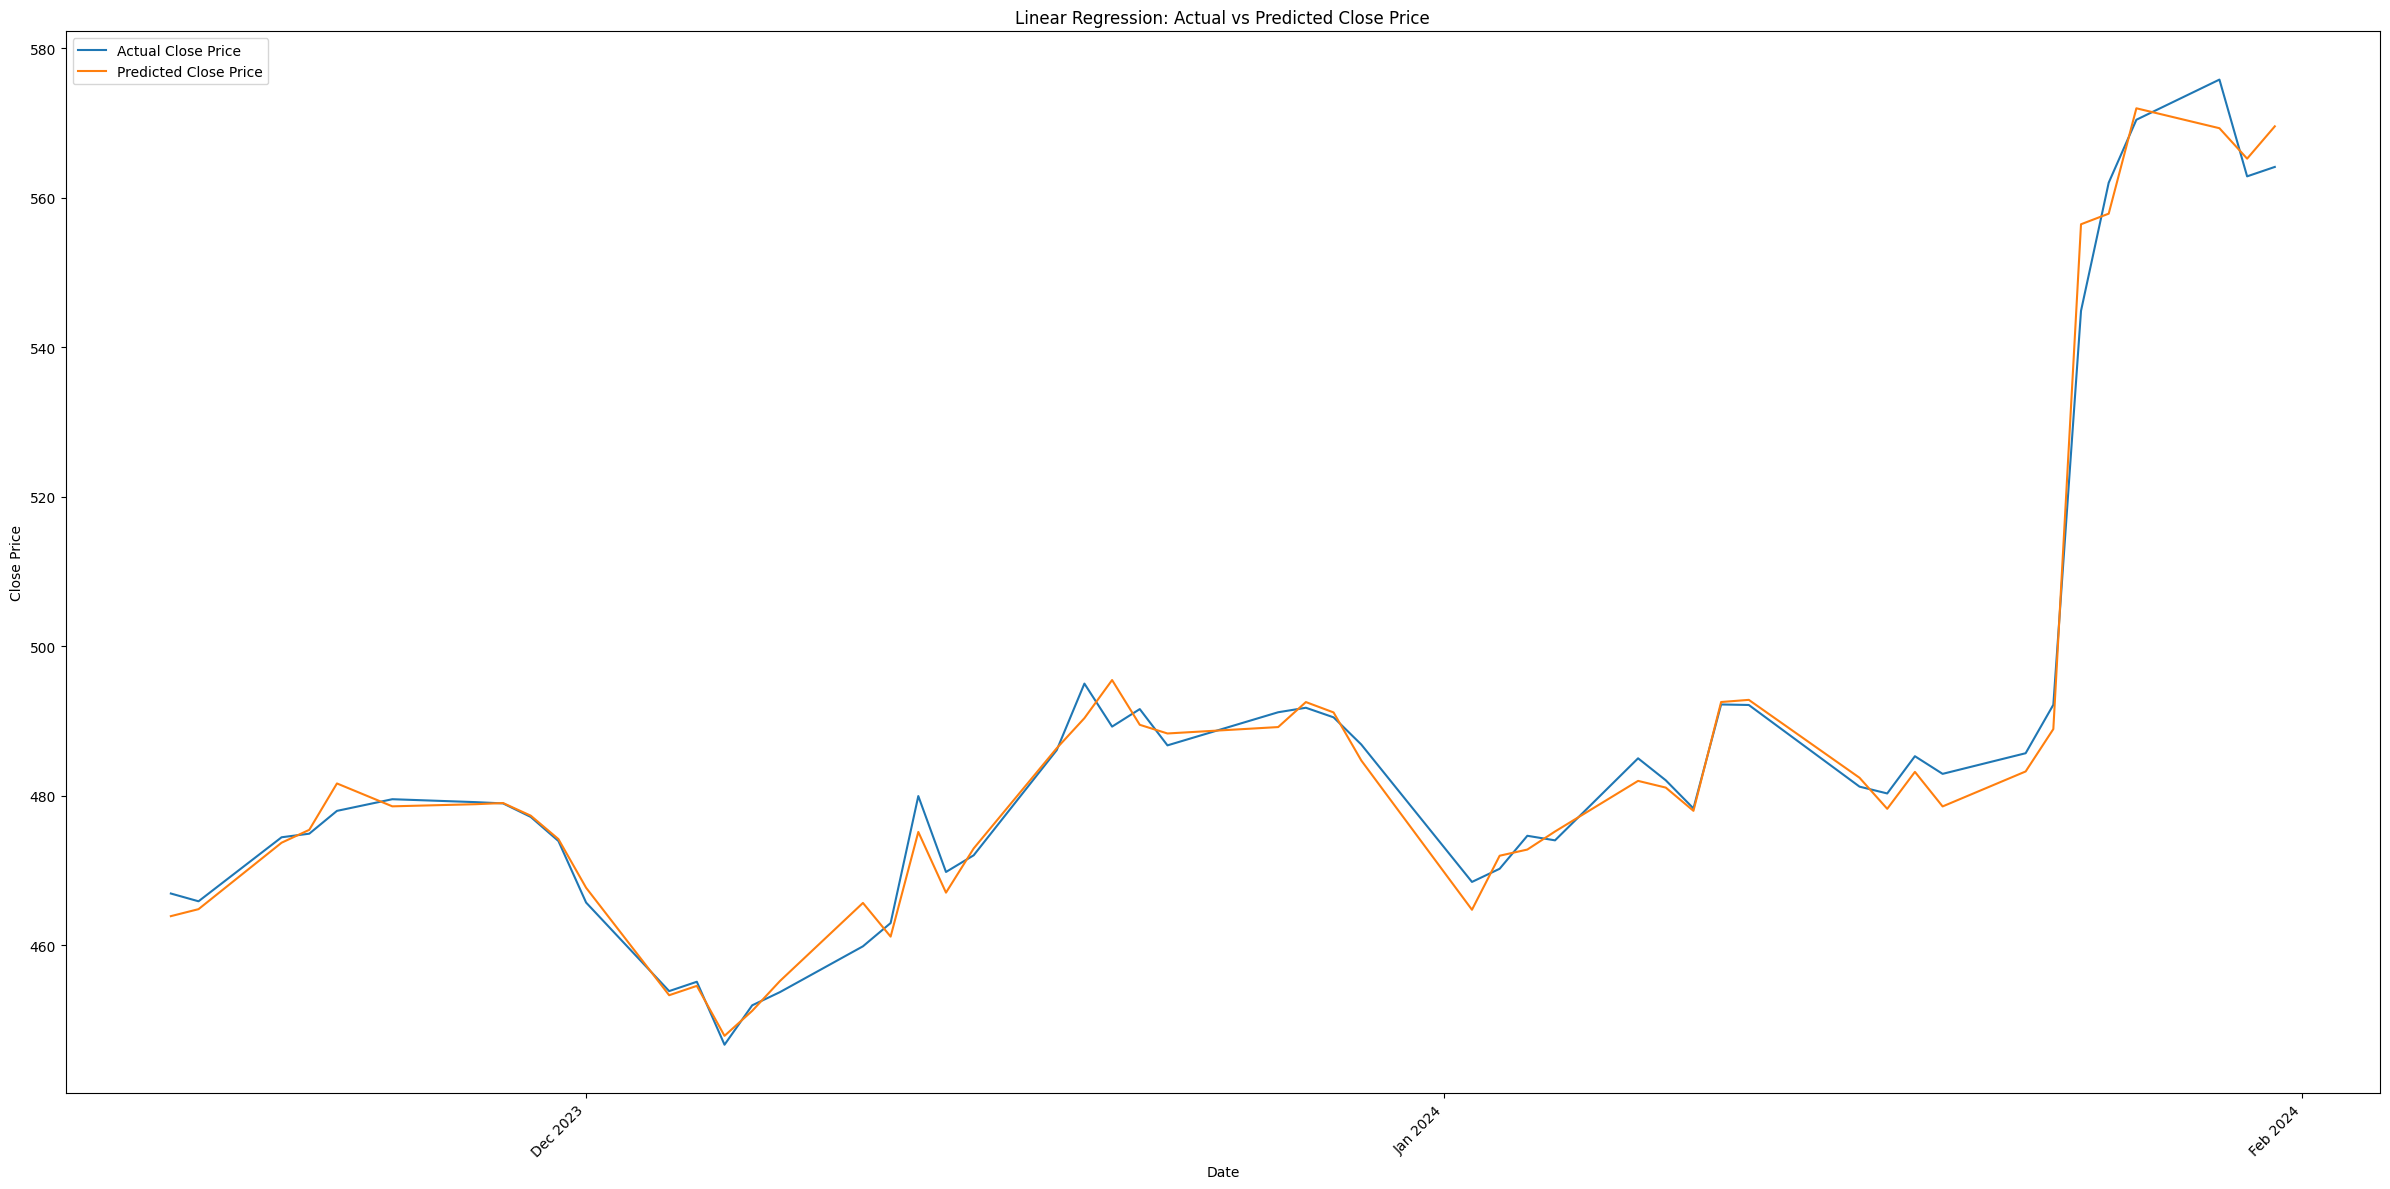

In [18]:
plt.figure(figsize=(24,12))
plt.plot(test_df['Date'], test_df[target_variable], label='Actual Close Price', color='C0')
plt.plot(test_df['Date'], linear_model_predictions, label='Predicted Close Price', color='C1')
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45, ha='right')
plt.title("Linear Regression: Actual vs Predicted Close Price")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.tight_layout()
plt.show()

### Calculation for the right value of K for KNN (K-Nearest Neighbors) Regression Model

In [32]:
from sklearn.neighbors import KNeighborsRegressor
k_values = range(1, 51)
knn_mse_results = {}
knn_rmse_results = {}
knn_r2_results = {}
for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(train_df[input_variables], train_df[target_variable])
    knn_predictions = knn_model.predict(test_df[input_variables])
    knn_mse_results[k] = mse(test_df[target_variable], knn_predictions)
    knn_rmse_results[k] = rmse(test_df[target_variable], knn_predictions)
    knn_r2_results[k] = r2(test_df[target_variable], knn_predictions)
    print(f"KNN (k={k}) - MSE: {knn_mse_results[k]}, RMSE: {knn_rmse_results[k]}, R2: {knn_r2_results[k]}")

best_k_mse = min(knn_mse_results, key=knn_mse_results.get)
best_k_rmse = min(knn_rmse_results, key=knn_rmse_results.get)
best_k_r2 = max(knn_r2_results, key=knn_r2_results.get)
print(f"Best k for MSE: {best_k_mse} with MSE: {knn_mse_results[best_k_mse]}")
print(f"Best k for RMSE: {best_k_rmse} with RMSE: {knn_rmse_results[best_k_rmse]}")
print(f"Best k for R2: {best_k_r2} with R2: {knn_r2_results[best_k_r2]}")

KNN (k=1) - MSE: 13523.165331299391, RMSE: 116.28914537178176, R2: -13.688723275476141
KNN (k=2) - MSE: 11283.60025152103, RMSE: 106.2242921911981, R2: -11.256130690207266
KNN (k=3) - MSE: 11709.675131630198, RMSE: 108.21125233371157, R2: -11.718928848421745
KNN (k=4) - MSE: 11091.869000079996, RMSE: 105.3179424413523, R2: -11.047874174318949
KNN (k=5) - MSE: 11094.658719713476, RMSE: 105.3311858839227, R2: -11.050904339129366
KNN (k=6) - MSE: 10983.756266742428, RMSE: 104.80341724744679, R2: -10.93044323388111
KNN (k=7) - MSE: 10659.91913418255, RMSE: 103.24688438002644, R2: -10.57869466688798
KNN (k=8) - MSE: 10482.397208599708, RMSE: 102.38357880343756, R2: -10.385872174791341
KNN (k=9) - MSE: 10503.001987405849, RMSE: 102.48415481139438, R2: -10.408252873882203
KNN (k=10) - MSE: 10367.102496172563, RMSE: 101.81896923546498, R2: -10.260640242438326
KNN (k=11) - MSE: 10409.27220074409, RMSE: 102.02584084801306, R2: -10.306444542384735
KNN (k=12) - MSE: 10404.018914273483, RMSE: 102.0

From the result above we can see that, the best value for K is 15 which have been tested by using three metrices for regression taught in class:
  * MSE
  * RMSE
  * R²

So we will go to train and test the KNN Model with k=15

### KNN (K-Nearest Neighbors) Regression Model Training

Selected best k value: 15
KNN Regression Model Performance on Test Set (k=15):
Mean Squared Error (MSE): 10312.782976276314
Root Mean Squared Error (RMSE): 101.55187332726223
R-squared (R2 ): -10.201638937886791


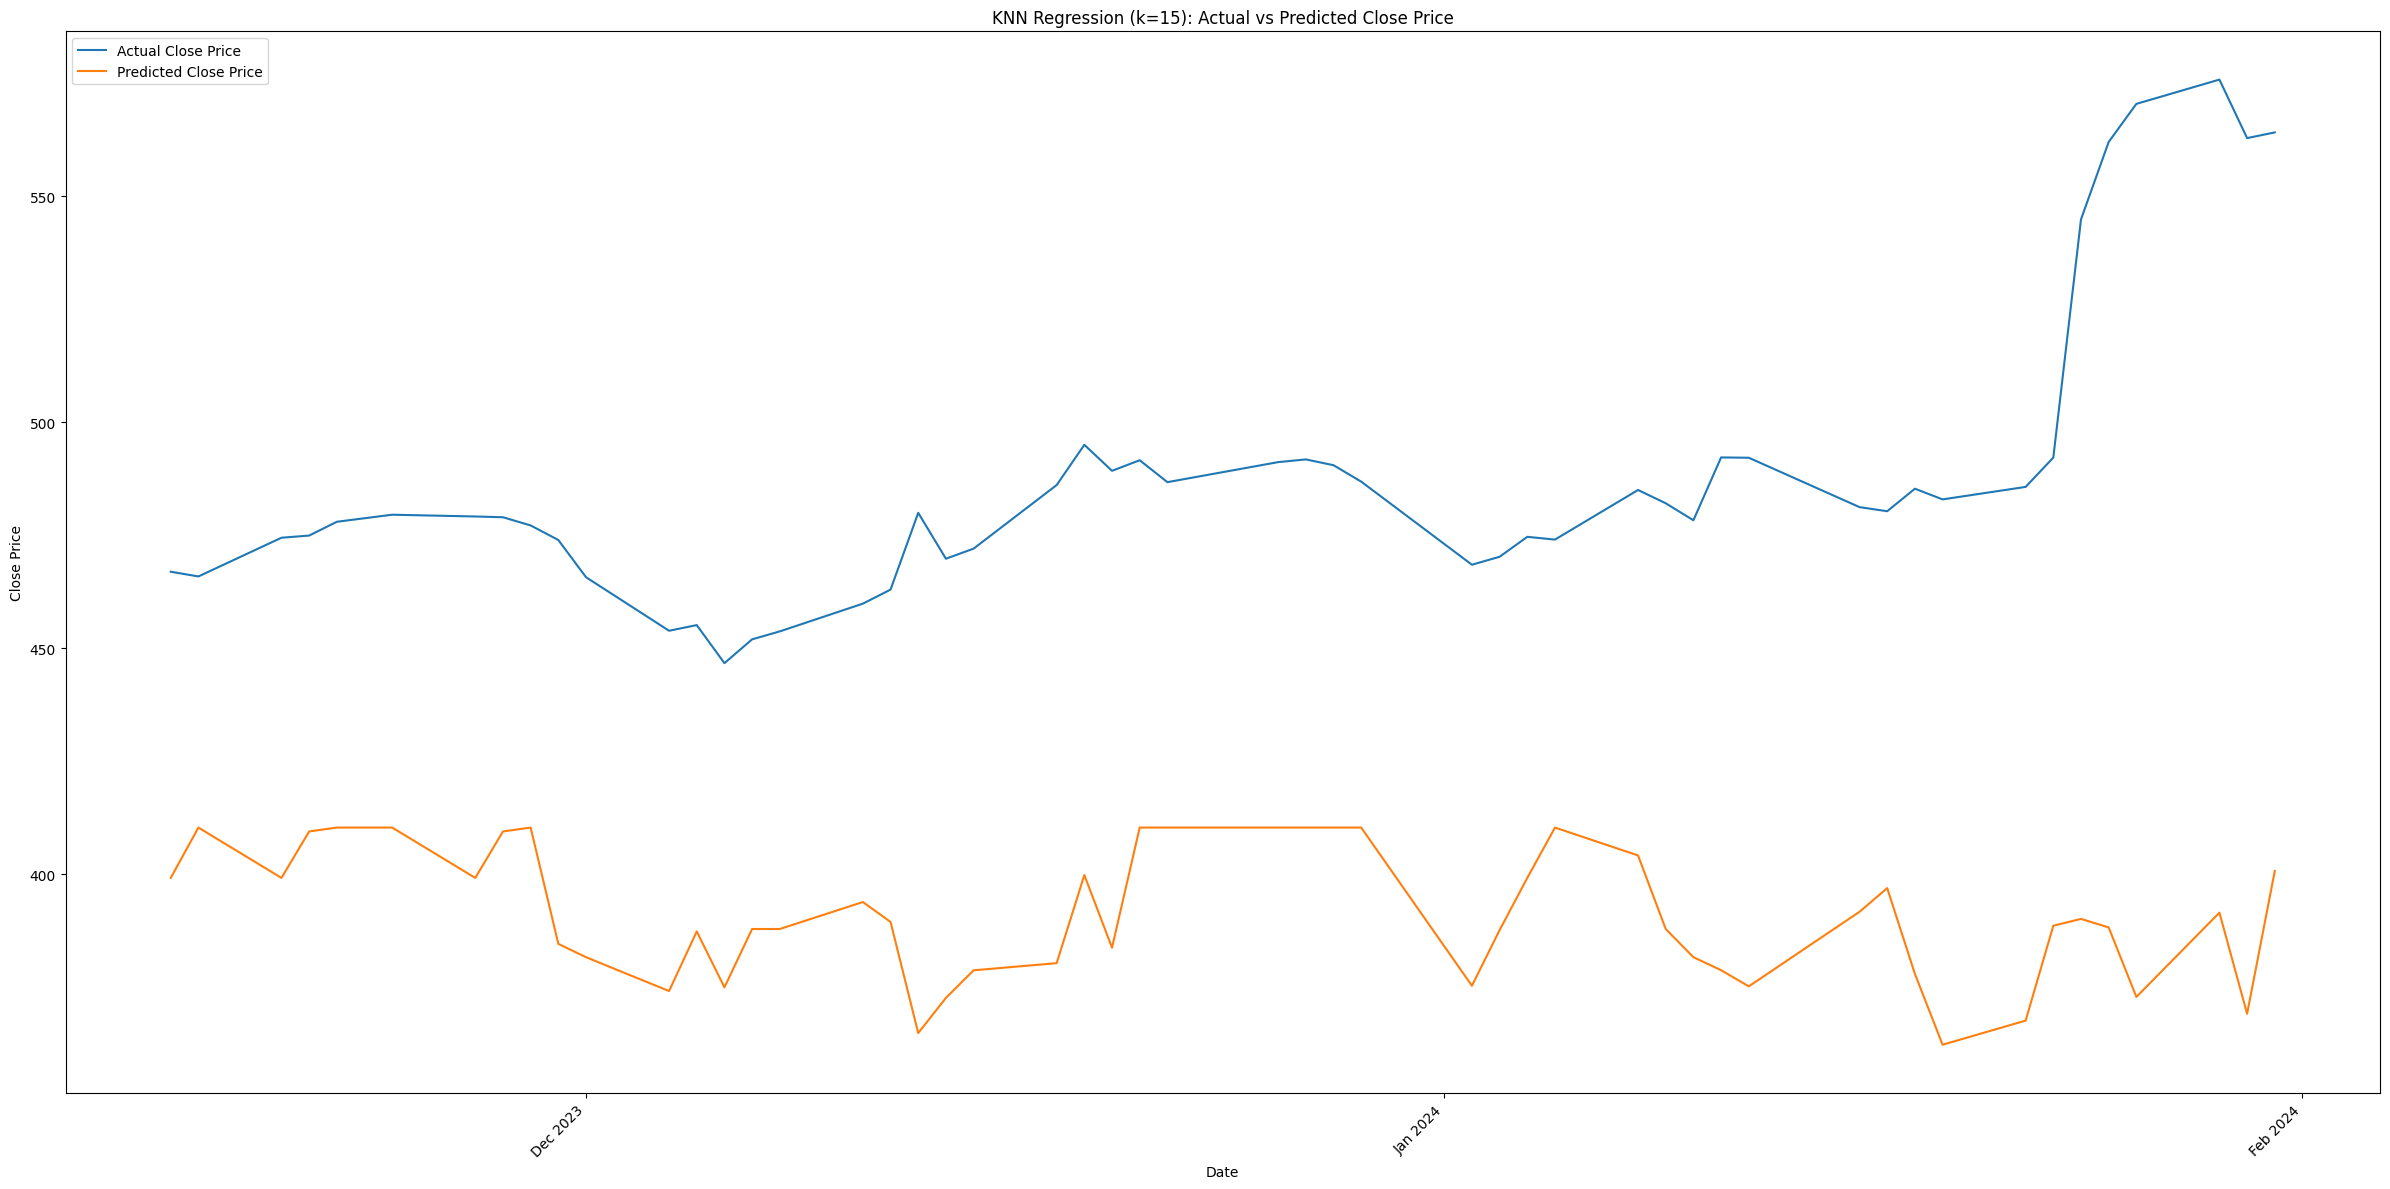

In [33]:
best_k_value = best_k_r2
print(f"Selected best k value: {best_k_value}")
knn_regression_model = KNeighborsRegressor(n_neighbors=best_k_value)
knn_regression_model.fit(train_df[input_variables], train_df[target_variable])
knn_regression_predictions = knn_regression_model.predict(test_df[input_variables])
knn_regression_mse = mse(test_df[target_variable], knn_regression_predictions)
knn_regression_rmse = rmse(test_df[target_variable], knn_regression_predictions)
knn_regression_r2 = r2(test_df[target_variable], knn_regression_predictions)
print(f"KNN Regression Model Performance on Test Set (k={best_k_value}):")
print(f"Mean Squared Error (MSE): {knn_regression_mse}")
print(f"Root Mean Squared Error (RMSE): {knn_regression_rmse}")
print(f"R-squared (R2 ): {knn_regression_r2}")
plt.figure(figsize=(24,12))
plt.plot(test_df['Date'], test_df[target_variable], label='Actual Close Price', color='C0')
plt.plot(test_df['Date'], knn_regression_predictions, label='Predicted Close Price', color='C1')
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45, ha='right')
plt.title(f"KNN Regression (k={best_k_value}): Actual vs Predicted Close Price")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.tight_layout()
plt.show()

### KNN Regression Model Predictions